In [1]:
#Importing necessary libraries  for visualization
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Reading dataset.
fake = pd.read_csv('fake_job_postings.csv')
fake.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
#Function for extracting country from the location attribute.
def extract_country(text):
    if isinstance(text,str):
        txt = text.split(",")
        extract = txt[0]
        return extract

In [4]:
fake['location'] = fake['location'].apply(extract_country)
fake['location']

#### Counting total number of fraud jobs present in the dataset.

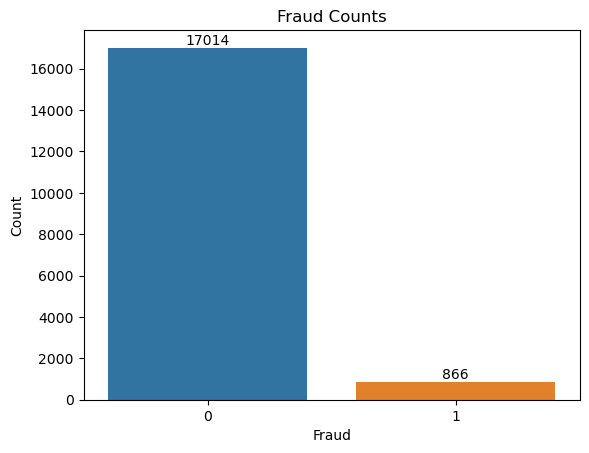

In [6]:
ax = sb.countplot(x='fraudulent',data=fake)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Fraud Counts')
plt.show()

In [7]:
# Grouping fake job post country wise.
fake_group = fake[fake['fraudulent']==1].groupby(['location'])[['fraudulent']].sum().reset_index()
fake_group

,location,fraudulent
0,AE,1
1,AU,40
2,BH,5
3,BR,1
4,CA,12
5,EE,1
6,EG,1
7,ES,1
8,GB,23
9,ID,1


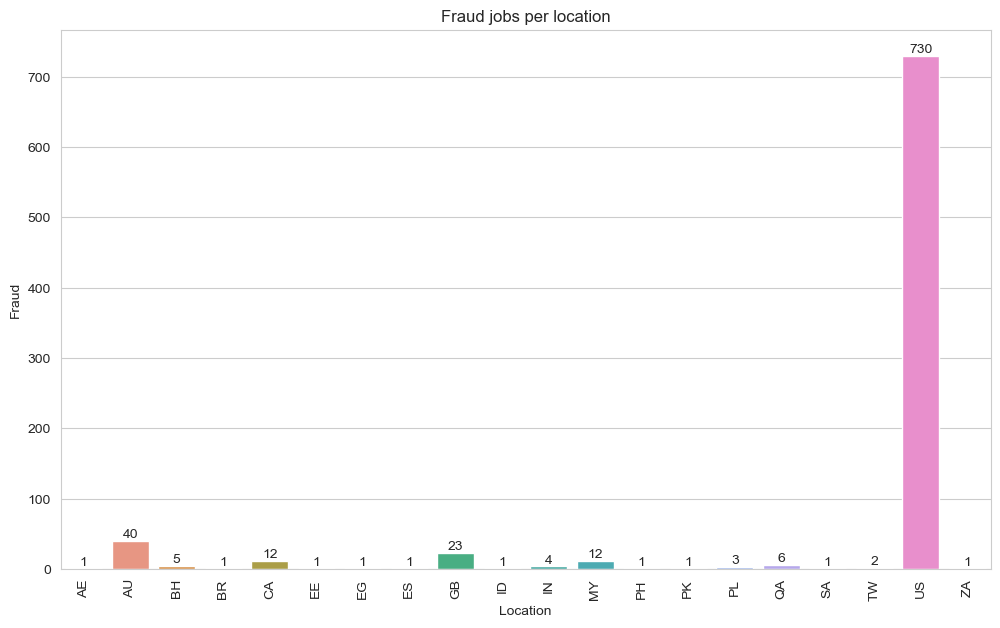

In [8]:
plt.figure(figsize=(12,7))
sb.set_style('whitegrid')
ax = sb.barplot(x='location',y='fraudulent',data=fake_group)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Fraud')
plt.title('Fraud jobs per location')
plt.show()

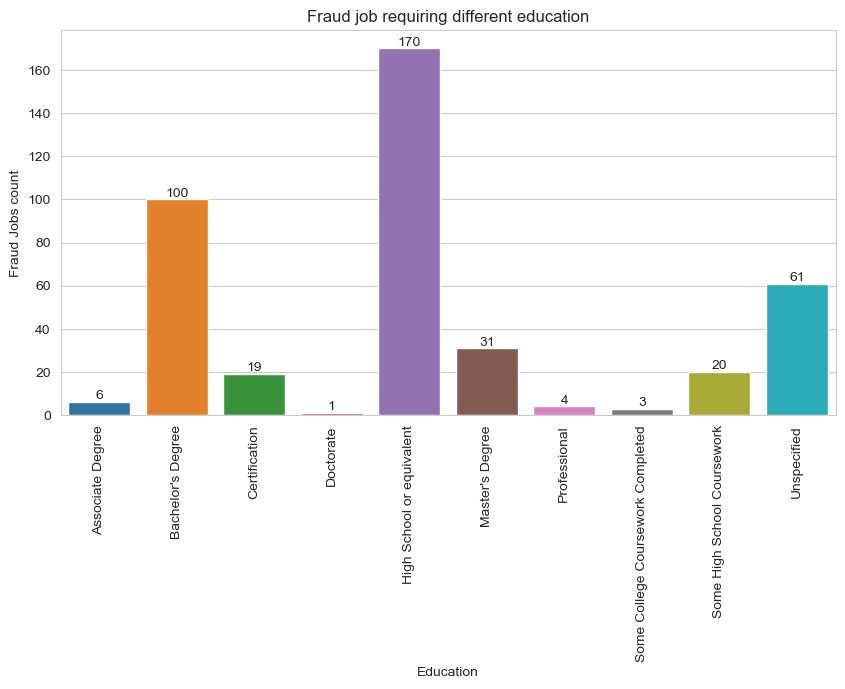

In [9]:
fake_edu = fake[fake['fraudulent']== 1].groupby('required_education')[['fraudulent']].sum().reset_index()
# Plotting this aggregated fake education dataframes for required education by fraud.
plt.figure(figsize=(10,5))
ax = sb.barplot(x='required_education',y='fraudulent',data=fake_edu)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Education')
plt.ylabel('Fraud Jobs count')
plt.xticks(rotation=90)
plt.title("Fraud job requiring different education")
plt.show()

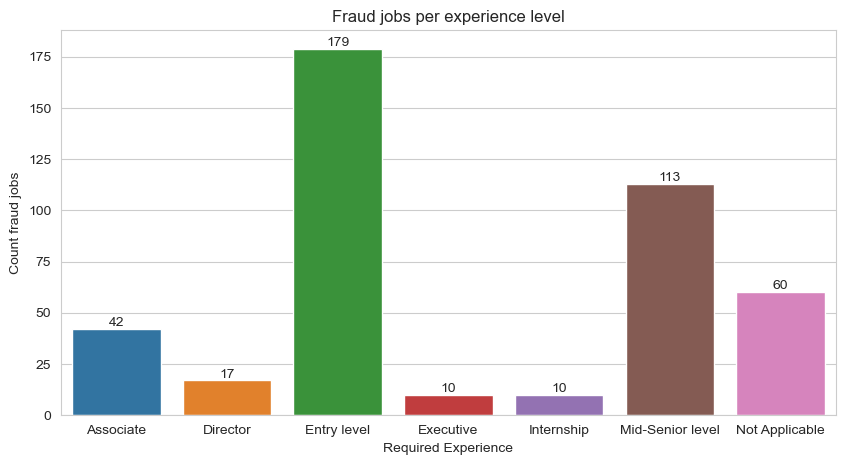

In [10]:
fake_exp = fake[fake['fraudulent']==1].groupby('required_experience')[['fraudulent']].sum().reset_index()
# Plotting required experience having fraud jobs.
plt.figure(figsize=(10,5))
ax = sb.barplot(x='required_experience',y='fraudulent',data=fake_exp)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Required Experience')
plt.ylabel('Count fraud jobs')
plt.title('Fraud jobs per experience level')
plt.show()

Entry level jobs and Mid-Senior level shows majority of fraud jobs. 

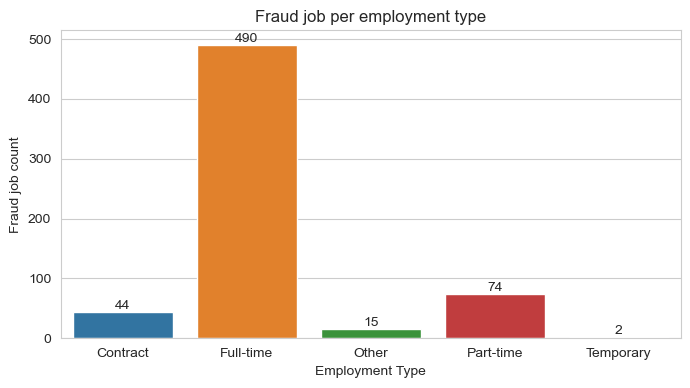

In [11]:
fake_emp = fake[fake['fraudulent']==1].groupby('employment_type')[['fraudulent']].sum().reset_index()
#plotting employment types having fraud jobs.
plt.figure(figsize=(8,4))
ax = sb.barplot(x='employment_type',y='fraudulent',data=fake_emp)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Employment Type')
plt.ylabel('Fraud job count')
plt.title('Fraud job per employment type')
plt.show()

The graph clearly suggests that full time employment type has recorded major fraud job.

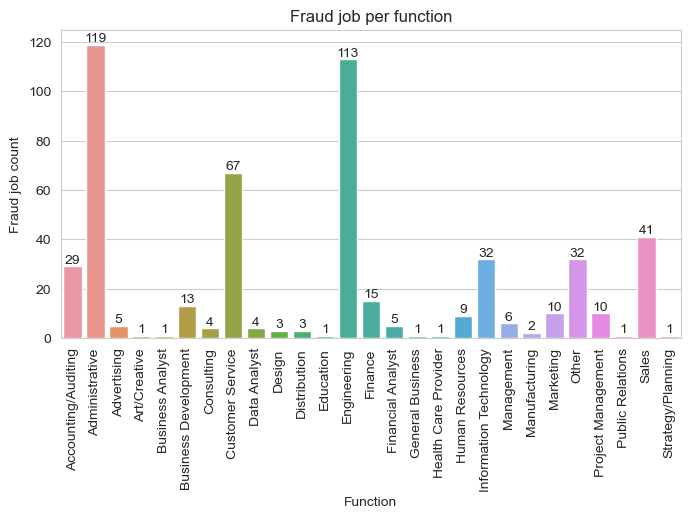

In [12]:
fake_func = fake[fake['fraudulent']==1].groupby('function')[['fraudulent']].sum().reset_index()
#plotting fraud jobs from job function.
plt.figure(figsize=(8,4))
ax = sb.barplot(x='function',y='fraudulent',data = fake_func)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Function')
plt.ylabel('Fraud job count')
plt.xticks(rotation=90)
plt.title('Fraud job per function')
plt.show()

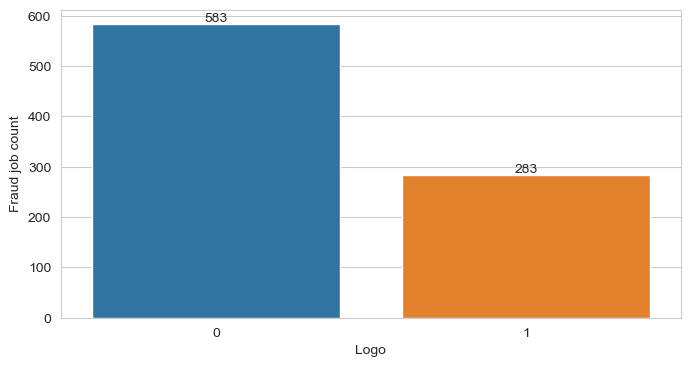

In [13]:
fake_logo = fake[fake['fraudulent']==1].groupby('has_company_logo')[['fraudulent']].sum().reset_index()
#Plotting fraud jobs for companies having logo.
plt.figure(figsize=(8,4))
ax = sb.barplot(x='has_company_logo',y='fraudulent',data=fake_logo)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Logo')
plt.ylabel('Fraud job count')
plt.show()

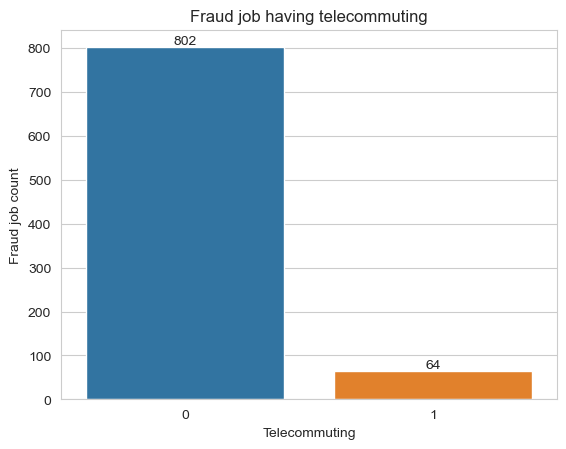

In [14]:
fake_telecommuting = fake[fake['fraudulent']==1].groupby('telecommuting')[['fraudulent']].sum().reset_index()
#plotting fraud jobs having telecommuting.
ax = sb.barplot(x = 'telecommuting',y = 'fraudulent',data = fake_telecommuting)
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Telecommuting')
plt.ylabel('Fraud job count')
plt.title('Fraud job having telecommuting')
plt.show()

In [15]:
fake.fillna(" ",inplace=True)

In [16]:
fake['job_info'] = fake['company_profile']+fake['description']+fake['requirements']

In [17]:
fake['job_info'].dtypes

dtype('O')

In [18]:
fake['words_count'] = fake['job_info'].apply(lambda x : len(x.split()))
word_count_fraud = fake.groupby('fraudulent')['words_count'].sum()
word_count_fraud

fraudulent
0    5858120
1     214750
Name: words_count, dtype: int64

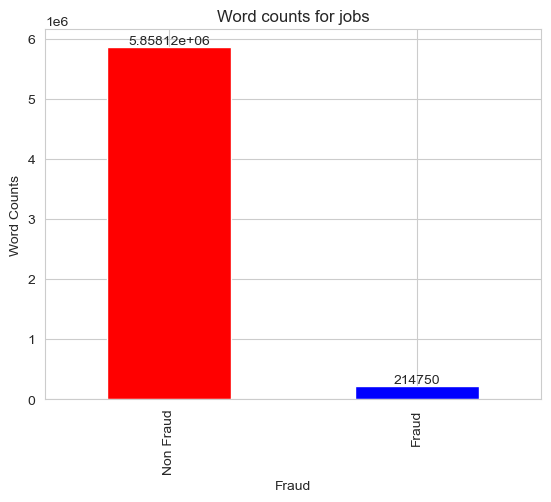

In [19]:
ax = word_count_fraud.plot(kind='bar',color=['red','blue'])
for label in ax.containers:
    ax.bar_label(label)
plt.title('Word counts for jobs')
plt.xlabel('Fraud')
plt.ylabel('Word Counts')
plt.xticks([0,1],['Non Fraud','Fraud'])
plt.show()

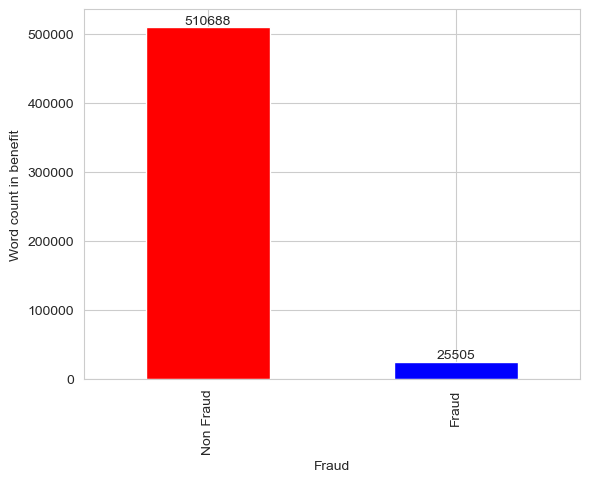

In [20]:
fake['word_benefit_count'] = fake['benefits'].apply(lambda x : len(x.split()))
word_benefit_fraud = fake.groupby('fraudulent')['word_benefit_count'].sum()
#Plotting the words length i benefits for fraud and non fraud jobs.
ax = word_benefit_fraud.plot(kind='bar',color=['red','blue'])
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Fraud')
plt.ylabel('Word count in benefit')
plt.xticks([0,1],['Non Fraud','Fraud'])
plt.show()

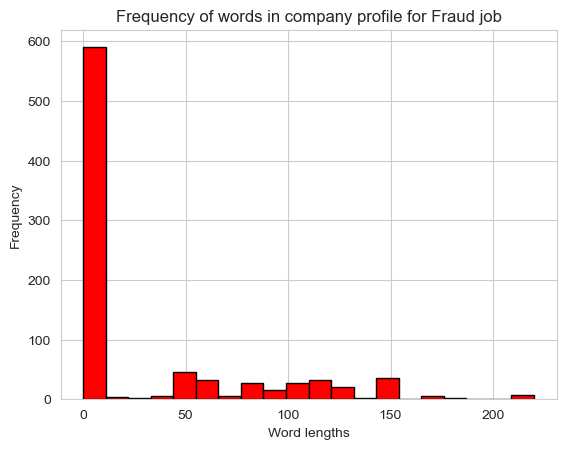

In [34]:
fake['word_company_description'] = fake['company_profile'].apply(lambda x : len(x.split()))
word_fraud_job = fake[fake['fraudulent']==1].groupby('fraudulent')['word_company_description']
word_fraud_job.plot(kind='hist',color='red',bins=20,edgecolor='k')
plt.xlabel('Word lengths')
plt.ylabel('Frequency')
plt.title('Frequency of words in company profile for Fraud job')
plt.show()

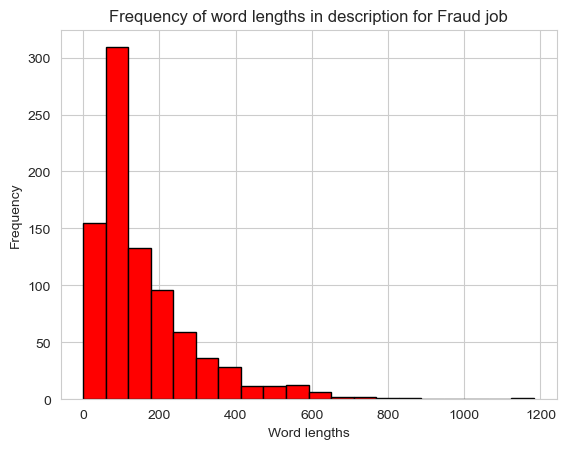

In [33]:
fake['word_description'] = fake['description'].apply( lambda x : len(x.split()))
word_description_fraud = fake[fake['fraudulent']==1].groupby('fraudulent')['word_description']
word_description_fraud.plot(kind='hist',color='red',edgecolor='k',bins=20)
plt.xlabel('Word lengths')
plt.ylabel('Frequency')
plt.title('Frequency of word lengths in description for Fraud job')
plt.show()

The above graphs gives some significant insights.
1) Majority of job posting which are classified as fake belong to US.
2) Bachelors degree and High school equivalent degree are primary targets for fake jobs posting as they lack in experience.
3) Entry level jobs have majority fake job postings. Potential reason might is one may lack sufficient knowledge and experience for detecting any kind of fraudulent aspect related to job post.
4) The length of words in fake job post is considerably less than the job post which are genuine.
5) Majority of fraud job posting has happened in Engineering and administrative sectors.
6) The fake job post consists of majority companies consisting no logos.